# Peptidase analysis

Author: Sandra Godinho Silva \
Creation date: 24/11/2020 \
Version: 0.1

In [9]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [10]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 1000)

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

## Metadata

In [12]:
metadata = pd.read_csv("../F3/All_info.csv")
metadata = metadata[["Assembly accession","Genus","Family"]]
metadata.head(2)

,Assembly accession,Genus,Family
0,GCA_000016645.1,Flavobacterium,Flavobacteriaceae
1,GCA_000023285.1,Capnocytophaga,Flavobacteriaceae


## Merops annotation

In [13]:
vir_orfs = pd.read_csv("../../3_Annotation/Merops/merops_counts.csv")
vir_orfs = vir_orfs.rename(columns={"Unnamed: 0":"ID"}).set_index("ID").T
vir_orfs["Merops orfs total"] = vir_orfs.sum(axis=1)
vir_orfs2 = vir_orfs.copy()
vir_orfs = vir_orfs.reset_index()
vir_orfs.head()

ID,index,MER0001423,MER0001295,MER0192051,MER0001009,MER0028365,MER0095620,MER0034615,MER0003514,MER0002251,MER0031610,MER0000474,MER0037236,MER0034539,MER0069741,MER0047723,MER0001421,MER0437468,MER0045886,MER0019759,MER0001158,MER0014664,MER0033186,MER0002084,MER0001521,MER0066178,MER0001978,MER0026545,MER0000485,MER0010975,MER0034582,MER0042827,MER0004090,MER0031431,MER0001322,MER0015121,MER0048181,MER0000410,MER0003413,MER0195774,MER0013623,MER0004035,MER0036115,MER0030932,MER0060647,MER0015475,MER0039993,MER0001161,MER0002639,MER0026262,MER0001400,MER0044357,MER0025086,MER0003380,MER0011781,MER0012158,MER0014135,MER0004775,MER0011440,MER0004469,MER0016191,MER0035036,MER0013626,MER0005196,MER0005768,MER0013976,MER0005767,MER0005169,MER0003242,MER0005139,MER0005496,MER0065588,MER0168983,MER0028934,MER0001012,MER0013876,MER0026552,MER0073084,MER0042581,MER0003339,MER0034541,MER0017033,MER0044622,MER0005244,MER0027775,MER1143079,MER0000389,MER0026494,MER0001244,MER0017177,MER0001297,MER0001243,MER0001299,MER0014366,MER0016185,MER0036308,MER0005300,MER0002959,MER0014065,MER0056047,MER0030244,MER0002968,MER0281397,MER0015424,MER0059846,MER0897124,MER0003338,MER0000277,MER0011464,MER0000831,MER0140154,MER0002443,MER0003972,MER0006319,MER0005900,MER0010944,MER0001121,MER0042387,MER0013458,MER0077555,MER0003376,MER0011411,MER0001920,MER0002031,MER0005694,MER0059675,MER0000589,MER0017123,MER0002489,MER0005663,MER0062058,MER0031565,MER0001289,MER0005764,MER0001284,MER0491616,MER0000338,MER0001699,MER0005124,MER0042974,MER0004914,MER0001266,MER0013957,MER0033259,MER0013471,MER0027368,MER0066182,MER0001123,MER0033274,MER0001513,MER0002007,MER0017069,MER0013541,MER0038688,MER0017243,MER0017250,MER0001287,MER0003280,MER0000392,MER0003906,MER0156574,MER0036072,MER0000332,MER0002755,MER0065554,MER0173063,MER0015473,MER0017367,MER0003336,MER0000443,MER0011900,MER0003537,MER0036027,MER0017368,MER0004925,MER0000436,MER0004196,MER0002036,MER0001945,MER0011720,MER0195376,MER0015142,MER0198917,MER0004160,MER0028087,MER0016301,MER0028025,MER0001313,MER0003850,MER0028047,MER0213595,MER0001350,MER0004931,MER0043394,MER0056525,MER0078640,MER0100667,MER0036114,MER0002565,MER0492485,MER0011509,MER0000471,MER0045094,MER0175622,MER0017401,MER0000432,MER0023167,MER0061102,MER0026339,MER0013425,MER0034548,MER0030235,MER0034659,MER0031563,MER0001236,MER0000472,MER0015462,MER0015691,MER0018254,MER0002601,MER0028284,MER0023251,MER0004146,MER0003105,MER0004801,MER0004154,MER0002746,MER0019881,MER0014333,MER0036073,MER0011416,MER0029719,MER0034558,MER0020326,MER0043008,MER0017142,MER0030934,MER0001612,MER0024252,MER0000265,MER0044996,MER0011256,MER0004954,MER0004514,MER0033237,MER0000313,MER0011907,MER0013450,MER0001269,MER0237414,MER0045479,MER0031432,MER0026496,MER0015621,MER0000310,MER0019096,MER0000320,MER0016067,MER0014188,MER0017239,MER0019092,MER0018473,MER0003327,MER0011345,MER0036053,MER0003448,MER0001233,MER0003359,MER0035017,MER0004321,MER0036038,MER0015336,MER0209507,MER0183709,MER0035032,MER0003817,MER0005778,MER0428540,MER0036036,MER0014721,MER0091680,MER0002655,MER0004468,MER0012283,MER0004923,MER0013829,MER0002161,MER0014418,MER0011700,MER0031491,MER0001333,MER0026471,MER0003558,MER0031562,MER0002014,MER0167712,MER0017193,MER0011583,MER0033176,MER0000576,MER0030136,MER0013479,MER0003543,MER0015166,MER0219770,MER0056022,MER0011369,MER0031614,MER0472834,MER0003812,MER0014140,MER0034745,MER0006204,MER0031618,MER0002455,MER0017009,MER0006198,MER0011666,MER0015415,MER0200437,MER0001709,MER0000315,MER0210990,MER0000459,MER0003802,MER0002060,MER0000319,MER0011806,MER0002459,MER0050859,MER0214982,MER0002299,MER0034665,MER0031433,MER0025512,MER0058228,MER0014137,MER0015468,MER0181656,MER0003798,MER0005742,MER0000266,MER0004953,MER0080749,MER0001285,MER0031611,MER0002038,MER0000329,MER0030246,MER0019280,MER0003065,MER0001185,MER0002355,MER0003629,MER0031616,MER0043146,MER0040529,MER0003303,MER0036044,MER0004959,MER0002635,MER0005331,MER0004857,MER001547

In [14]:
merops = vir_orfs[["index", "Merops orfs total"]]
merops.head()

ID,index,Merops orfs total
0,GCA_900186545.1,102
1,GCA_900312745.1,244
2,GCA_006716485.1,198
3,GCA_009799805.1,99
4,GCA_900610345.1,101


In [15]:
vir_orfs3 = vir_orfs2.copy()
vir_orfs3 = vir_orfs3.drop(columns=["Merops orfs total"]).T
vir_orfs3["Total in dataset"] = vir_orfs3.sum(axis=1)
vir_orfs3 = vir_orfs3.sort_values("Total in dataset", ascending=False)
vir_orfs3.head()

,GCA_900186545.1,GCA_900312745.1,GCA_006716485.1,GCA_009799805.1,GCA_900610345.1,GCA_000425505.1,GCA_900105105.1,GCA_002715085.1,GCA_003812705.1,GCA_009921505.1,GCA_014138495.1,GCA_002472765.1,GCA_002719535.1,GCA_002943675.1,GCA_002388705.1,GCA_004321735.1,GCA_004368925.1,GCA_014220145.1,GCA_002737105.1,GCA_001280505.1,GCA_012932585.1,GCA_002345305.1,GCA_003243255.1,GCA_009870135.1,GCA_903819445.1,GCA_003634585.1,GCA_902168145.1,GCA_009659705.1,GCA_003626835.1,GCA_013043105.1,GCA_009834475.1,GCA_002477625.1,GCA_014218885.1,GCA_000428485.1,GCA_900538225.1,GCA_003454375.1,GCA_004010055.1,GCA_003410315.1,GCA_001618545.2,GCA_004341805.1,GCA_002376145.1,GCA_002364335.1,GCA_001045455.1,GCA_011752975.1,GCA_000611675.1,GCA_001418085.1,GCA_014220365.1,GCA_002338325.1,GCA_013404085.1,GCA_000282115.1,GCA_900099995.1,GCA_013205245.1,GCA_004362395.1,GCA_000496035.1,GCA_000152985.1,GCA_004121075.1,GCA_900167905.1,GCA_000747685.1,GCA_003815655.1,GCA_003626755.1,GCA_004346845.1,GCA_001280515.1,GCA_001464475.1,GCA_900198195.1,GCA_000789235.1,GCA_002430025.1,GCA_000220625.1,GCA_003538255.1,GCA_900092085.1,GCA_001430825.1,GCA_001800975.1,GCA_003815875.1,GCA_000430665.1,GCA_902804485.1,GCA_002001005.1,GCA_003511865.1,GCA_900142775.1,GCA_002201315.1,GCA_900099675.1,GCA_000382425.1,GCA_004916905.1,GCA_900156625.1,GCA_010993855.1,GCA_000153485.2,GCA_014220755.1,GCA_000496015.1,GCA_000173095.1,GCA_006491645.1,GCA_900156685.1,GCA_013042255.1,GCA_900104375.1,GCA_000468595.1,GCA_000812985.1,GCA_013001145.1,GCA_002703565.1,GCA_002023425.1,GCA_007109225.1,GCA_009684755.1,GCA_002454095.1,GCA_003386855.1,GCA_003516945.1,GCA_002710605.1,GCA_013410675.1,GCA_008081325.1,GCA_003001695.1,GCA_900156585.1,GCA_003581615.1,GCA_000568425.1,GCA_003337305.1,GCA_003314435.2,GCA_002117085.1,GCA_008017345.1,GCA_003350545.1,GCA_004349195.1,GCA_000333355.1,GCA_008000935.1,GCA_000192225.1,GCA_002323395.1,GCA_014202195.1,GCA_900106825.1,GCA_002345565.1,GCA_013002225.1,GCA_003504555.1,GCA_003971235.1,GCA_000812865.1,GCA_002964975.1,GCA_013001285.1,GCA_009648535.1,GCA_003984825.1,GCA_001898255.1,GCA_900186805.1,GCA_900312815.1,GCA_002302515.1,GCA_002320285.1,GCA_002023325.1,GCA_900141665.1,GCA_009792295.1,GCA_001027945.1,GCA_014220615.1,GCA_000271925.1,GCA_005780245.1,GCA_001438125.1,GCA_002023665.2,GCA_007997115.1,GCA_004349355.1,GCA_002470025.1,GCA_009711165.1,GCA_004211875.1,GCA_001898785.1,GCA_010365135.1,GCA_900610225.1,GCA_002024825.1,GCA_002683555.1,GCA_003024155.1,GCA_002440605.1,GCA_002954665.1,GCA_002770595.1,GCA_001549985.1,GCA_000744105.1,GCA_009753805.1,GCA_002414635.1,GCA_000425485.1,GCA_013276225.1,GCA_900111025.1,GCA_002471745.1,GCA_002716845.1,GCA_002365615.1,GCA_014050215.1,GCA_014220245.1,GCA_002222055.1,GCA_010725055.1,GCA_000423065.1,GCA_001672305.1,GCA_002453775.1,GCA_011525065.1,GCA_004216895.1,GCA_006716585.1,GCA_002198115.1,GCA_003385495.1,GCA_004366435.1,GCA_002311725.1,GCA_002428305.1,GCA_003992595.1,GCA_004959765.1,GCA_003688495.1,GCA_011601245.1,GCA_900148835.1,GCA_900110335.1,GCA_002433125.1,GCA_002754245.1,GCA_004364975.1,GCA_012269955.1,GCA_002843175.1,GCA_013204145.1,GCA_003867075.1,GCA_004349145.1,GCA_000971645.2,GCA_002714815.1,GCA_001573155.1,GCA_002696305.1,GCA_000297855.1,GCA_000799195.1,GCA_014305215.1,GCA_009865665.1,GCA_000332115.1,GCA_002781585.1,GCA_900610045.1,GCA_001995115.1,GCA_000422265.1,GCA_002728045.1,GCA_013003145.1,GCA_004214175.1,GCA_900624725.1,GCA_900168045.1,GCA_002726175.1,GCA_001428525.1,GCA_002217355.1,GCA_002217395.1,GCA_002482885.1,GCA_002754195.1,GCA_000729985.1,GCA_900239185.1,GCA_002022025.1,GCA_011764015.1,GCA_007827205.1,GCA_900129545.1,GCA_003208535.1,GCA_002709185.1,GCA_003268815.1,GCA_005885635.1,GCA_002747735.1,GCA_002733185.1,GCA_000382125.1,GCA_001683915.1,GCA_006381105.1,GCA_004310335.1,GCA_000173115.1,GCA_004295795.1,GCA_009848495.1,GCA_001693475.1,GCA_012974865.1,GCA_003387615.1,GCA_014220795.1,GCA_001889005.1,GCA_000224085.1,GCA_003614945.1,GCA_001027725.1,GCA_900104765.1,GCA_002363875.1,GCA_003253545.1

# Map

In [16]:
map_vfs = pd.read_csv("../../3_Annotation/Merops/merops_ids.csv")
map_vfs.tail()

,ID,name,organism,desc,source
5004,MER1153742,Mug105,Saccharomyces pombe,NaN,NaN
5005,MER1239413,mavirus processing peptidase,NaN,[C120.001]#C120#{peptidase unit: 1-189},YP_004300294
5006,MER1251407,NaN,Homo sapiens,[C121.002]#C121#{peptidase unit: 441-713},MINY4_HUMAN
5007,MER1251425,MINDY-4 peptidase,Homo sapiens,[C121.001]#C121#{peptidase unit: 12-261},MINY3_HUMAN
5008,MER1365461,strawberry mottle virus glutamic peptidase,NaN,[G03.001]#G03#{peptidase unit: 1102-1335},A0A142I1A6


In [17]:
map_vfs["ID"].value_counts()

MER0208680    1
MER0002563    1
MER0000941    1
MER0003094    1
MER0029680    1
             ..
MER0048623    1
MER0005223    1
MER0036359    1
MER0025099    1
MER0001092    1
Name: ID, Length: 5009, dtype: int64

In [18]:
vir_orfs4 = pd.merge(vir_orfs3, map_vfs, how="left", left_index=True, right_on="ID")
vir_orfs4.head(2)

,GCA_900186545.1,GCA_900312745.1,GCA_006716485.1,GCA_009799805.1,GCA_900610345.1,GCA_000425505.1,GCA_900105105.1,GCA_002715085.1,GCA_003812705.1,GCA_009921505.1,GCA_014138495.1,GCA_002472765.1,GCA_002719535.1,GCA_002943675.1,GCA_002388705.1,GCA_004321735.1,GCA_004368925.1,GCA_014220145.1,GCA_002737105.1,GCA_001280505.1,GCA_012932585.1,GCA_002345305.1,GCA_003243255.1,GCA_009870135.1,GCA_903819445.1,GCA_003634585.1,GCA_902168145.1,GCA_009659705.1,GCA_003626835.1,GCA_013043105.1,GCA_009834475.1,GCA_002477625.1,GCA_014218885.1,GCA_000428485.1,GCA_900538225.1,GCA_003454375.1,GCA_004010055.1,GCA_003410315.1,GCA_001618545.2,GCA_004341805.1,GCA_002376145.1,GCA_002364335.1,GCA_001045455.1,GCA_011752975.1,GCA_000611675.1,GCA_001418085.1,GCA_014220365.1,GCA_002338325.1,GCA_013404085.1,GCA_000282115.1,GCA_900099995.1,GCA_013205245.1,GCA_004362395.1,GCA_000496035.1,GCA_000152985.1,GCA_004121075.1,GCA_900167905.1,GCA_000747685.1,GCA_003815655.1,GCA_003626755.1,GCA_004346845.1,GCA_001280515.1,GCA_001464475.1,GCA_900198195.1,GCA_000789235.1,GCA_002430025.1,GCA_000220625.1,GCA_003538255.1,GCA_900092085.1,GCA_001430825.1,GCA_001800975.1,GCA_003815875.1,GCA_000430665.1,GCA_902804485.1,GCA_002001005.1,GCA_003511865.1,GCA_900142775.1,GCA_002201315.1,GCA_900099675.1,GCA_000382425.1,GCA_004916905.1,GCA_900156625.1,GCA_010993855.1,GCA_000153485.2,GCA_014220755.1,GCA_000496015.1,GCA_000173095.1,GCA_006491645.1,GCA_900156685.1,GCA_013042255.1,GCA_900104375.1,GCA_000468595.1,GCA_000812985.1,GCA_013001145.1,GCA_002703565.1,GCA_002023425.1,GCA_007109225.1,GCA_009684755.1,GCA_002454095.1,GCA_003386855.1,GCA_003516945.1,GCA_002710605.1,GCA_013410675.1,GCA_008081325.1,GCA_003001695.1,GCA_900156585.1,GCA_003581615.1,GCA_000568425.1,GCA_003337305.1,GCA_003314435.2,GCA_002117085.1,GCA_008017345.1,GCA_003350545.1,GCA_004349195.1,GCA_000333355.1,GCA_008000935.1,GCA_000192225.1,GCA_002323395.1,GCA_014202195.1,GCA_900106825.1,GCA_002345565.1,GCA_013002225.1,GCA_003504555.1,GCA_003971235.1,GCA_000812865.1,GCA_002964975.1,GCA_013001285.1,GCA_009648535.1,GCA_003984825.1,GCA_001898255.1,GCA_900186805.1,GCA_900312815.1,GCA_002302515.1,GCA_002320285.1,GCA_002023325.1,GCA_900141665.1,GCA_009792295.1,GCA_001027945.1,GCA_014220615.1,GCA_000271925.1,GCA_005780245.1,GCA_001438125.1,GCA_002023665.2,GCA_007997115.1,GCA_004349355.1,GCA_002470025.1,GCA_009711165.1,GCA_004211875.1,GCA_001898785.1,GCA_010365135.1,GCA_900610225.1,GCA_002024825.1,GCA_002683555.1,GCA_003024155.1,GCA_002440605.1,GCA_002954665.1,GCA_002770595.1,GCA_001549985.1,GCA_000744105.1,GCA_009753805.1,GCA_002414635.1,GCA_000425485.1,GCA_013276225.1,GCA_900111025.1,GCA_002471745.1,GCA_002716845.1,GCA_002365615.1,GCA_014050215.1,GCA_014220245.1,GCA_002222055.1,GCA_010725055.1,GCA_000423065.1,GCA_001672305.1,GCA_002453775.1,GCA_011525065.1,GCA_004216895.1,GCA_006716585.1,GCA_002198115.1,GCA_003385495.1,GCA_004366435.1,GCA_002311725.1,GCA_002428305.1,GCA_003992595.1,GCA_004959765.1,GCA_003688495.1,GCA_011601245.1,GCA_900148835.1,GCA_900110335.1,GCA_002433125.1,GCA_002754245.1,GCA_004364975.1,GCA_012269955.1,GCA_002843175.1,GCA_013204145.1,GCA_003867075.1,GCA_004349145.1,GCA_000971645.2,GCA_002714815.1,GCA_001573155.1,GCA_002696305.1,GCA_000297855.1,GCA_000799195.1,GCA_014305215.1,GCA_009865665.1,GCA_000332115.1,GCA_002781585.1,GCA_900610045.1,GCA_001995115.1,GCA_000422265.1,GCA_002728045.1,GCA_013003145.1,GCA_004214175.1,GCA_900624725.1,GCA_900168045.1,GCA_002726175.1,GCA_001428525.1,GCA_002217355.1,GCA_002217395.1,GCA_002482885.1,GCA_002754195.1,GCA_000729985.1,GCA_900239185.1,GCA_002022025.1,GCA_011764015.1,GCA_007827205.1,GCA_900129545.1,GCA_003208535.1,GCA_002709185.1,GCA_003268815.1,GCA_005885635.1,GCA_002747735.1,GCA_002733185.1,GCA_000382125.1,GCA_001683915.1,GCA_006381105.1,GCA_004310335.1,GCA_000173115.1,GCA_004295795.1,GCA_009848495.1,GCA_001693475.1,GCA_012974865.1,GCA_003387615.1,GCA_014220795.1,GCA_001889005.1,GCA_000224085.1,GCA_003614945.1,GCA_001027725.1,GCA_900104765.1,GCA_002363875.1,GCA_003253545.1

In [19]:
vir_orfs5 = vir_orfs4.groupby("name").sum()
vir_orfs5 = vir_orfs5.T.reset_index()
vir_orfs5.head(2)

name,index,1700122C07Rik protein,"2-hydroxy-6-oxo-6-phenylhexa-2,4-dienoate hydrolase",2210023G05RIK protein,9030624L02RIK-like protein,ADAM12 peptidase,ADAM13 peptidase,ADAM19 peptidase,ADAM20 peptidase,ADAM21 peptidase,ADAM24 peptidase,ADAM28 peptidase,ADAM9 peptidase,ALE-1 glycylglycine endopeptidase,ALTERED MERISTEM PROGRAM1-like peptidase,AM-1 aminopeptidase,ASUB peptidase,AT4g33090 g.p.,AT5G17720 protein,AT5G17780 protein,AT5G22460 protein,AaaA aminopeptidase,Aad peptidase,Aap1' aminopeptidase,AarA peptidase,Abhd2a protein,Afg3-like protein 2,AlbD protein,AmpH protein,Anbu protein,Ape2 aminopeptidase,Apr peptidase,AprP peptidase,AprX peptidase,ArgJ protein,AsnB protein,At1g02560,At1g11080,At1g11090,At1g12750,At1g13270,At1g13610,At1g14270,At1g15045,At1g17430,At1g18360,At1g18600,At1g20380,At1g25220,At1g25290,At1g26120,At1g28110,At1g29840,At1g33540,At1g52580,At1g63660,At1g64670,At1g66670,At1g66900,At1g67420,At1g68620,At1g68900,At1g69020 g.p.,At1g70170,At1g71696,At1g72620,At1g73290,At1g73300,At1g73480,At1g74280,At1g76140,At1g77420,At1g78210,At2g16570,At2g18360,At2g19550,At2g20725,At2g22990,At2g23000,At2g23010,At2g24200,At2g24320,At2g29050,At2g39400,At2g39410,At2g39420,At2g45600,At2g47630,At3g01690,At3g02720,At3g02875,At3g03990,At3g05350,At3g05780,At3g09690,At3g10450,At3g10840 protein,At3g12220,At3g16150,At3g16550,At3g26085,At3g27740,At3g30380,At3g47560,At3g47590,At3g52000,At3g52020,At3g53780,At3g55180,At3g56540,At4g10030,At4g10050,At4g17150,At4g23070,At4g24150,At4g29210,At4g31020,At4g33180/At4g33190,At4g34740,At4g36530,At4g36610,At4g36760 g.p.,At4g37040,At4g37470,At4g38880,At4g39650,At5g02970,At5g04710,At5g07250,At5g08100,At5g09430,At5g09640,At5g11650,At5g13520 g.p.,At5g13800,At5g14390,At5g15860,At5g16080,At5g16120,At5g19630,At5g19740,At5g19850,At5g20520,At5g20660,At5g21950,At5g23140,At5g23530,At5g24260,At5g25770,At5g26860,At5g38220,At5g38520,At5g39220,At5g41900,At5g42320,At5g46390,At5g51740,At5g53050 or MhpC protein,At5g54140,At5g56650,At5g56730,At5g60160,At5g62180,AtFtsH1 peptidase,AtFtsH10 peptidase,AtFtsH11 peptidase,AtFtsH3 peptidase,AtFtsH5 peptidase,B0495.7 g.p.,BACCAC_01431 g.p.,BC026374 protein,BC4143 protein,BF9343_2924 g.p.,BG:DS00365.1 protein,BIRC-3 protein,BSNT_05883 g.p.,BSSC8_21440 g.p.,BSSC8_26020 g.p.,BSU23640 g.p.,BSU33620 g.p.,BSU6633_13517 g.p.,BT3549 putative peptidase,BapA peptidase,BapF peptidase,BcepAP aminopeptidase,BepA,BioH protein,BlaR1 peptidase,Bsubs1_010100013116 g.p.,C-terminal processing peptidase-1,C-terminal processing peptidase-2,C-terminal processing peptidase-3,C14orf29 protein,C35C5.2 g.p.,CAAX amino terminal peptidase,CC-III peptidase,CDF peptidase,CG10051 protein,CG10062 protein,CG1009 g.p.,CG10602 g.p.,CG11309 protein,CG11428,CG11529 protein,CG11951 protein,CG11956 protein,CG11961 protein,CG12133 protein,CG12374 protein,CG13160 protein,CG15111 protein,CG15253 protein,CG15820 protein,CG15879 protein,CG17571 protein,CG18642,CG1882 protein,CG2528 protein,CG2915 protein,CG3097 protein,CG31343 protein,CG32379 protein,CG3502 protein,CG4017 protein,CG42750 g.p.,CG4927 protein,CG5377,CG5704 protein,CG5707 protein,CG5715 protein,CG5845 protein,CG6154 protein,CG6512 protein,CG6696 protein,CG6763 protein,CG7142 protein,CG7529 protein,CG7649 protein,CG8539 protein,CG8560 protein,CG8562 protein,CG8563 protein,CG8773 protein,CG8774 protein,CG9542 protein,CGI-58 putative peptidase,CP70 cold-active peptidase,CPG70 carboxypeptidase,CPO-A2,CPX2 protein,CPXaC peptidase,CTP synthetase,CapD poly-gamma-glutamate hydrolase,Caul_3875-type dipeptidase,CelM peptidase,Cg30047 protein,Cg31019-pa,Cg33013-pb protein,Cg8972 protein,ClpP1 peptidase,ClpP4 peptidase,ComC peptidase,Cp-IAP protein,CspA peptidase,CspB peptidase,CspC peptidase,CtpA peptidase,CtpB peptidase,CtpC peptidase,D-Ala-D-Ala carboxypeptidase,D-Ala-D-Ala carboxypeptidase B,D-Ala-D-Ala carboxypeptidase DacF,D-Ala-D-Ala carboxypeptidase PBP3,D-Ala-D-Ala peptidase C,D-amino acid amidase,D-aminopeptidase DppA,D230019K24Rik peptidase,DD-carboxypeptida

### Merge with metadata:

In [20]:
df = pd.merge(vir_orfs, metadata, left_on="index", left_index=True, right_on="Assembly accession")
df.head(2)

,index,MER0001423,MER0001295,MER0192051,MER0001009,MER0028365,MER0095620,MER0034615,MER0003514,MER0002251,MER0031610,MER0000474,MER0037236,MER0034539,MER0069741,MER0047723,MER0001421,MER0437468,MER0045886,MER0019759,MER0001158,MER0014664,MER0033186,MER0002084,MER0001521,MER0066178,MER0001978,MER0026545,MER0000485,MER0010975,MER0034582,MER0042827,MER0004090,MER0031431,MER0001322,MER0015121,MER0048181,MER0000410,MER0003413,MER0195774,MER0013623,MER0004035,MER0036115,MER0030932,MER0060647,MER0015475,MER0039993,MER0001161,MER0002639,MER0026262,MER0001400,MER0044357,MER0025086,MER0003380,MER0011781,MER0012158,MER0014135,MER0004775,MER0011440,MER0004469,MER0016191,MER0035036,MER0013626,MER0005196,MER0005768,MER0013976,MER0005767,MER0005169,MER0003242,MER0005139,MER0005496,MER0065588,MER0168983,MER0028934,MER0001012,MER0013876,MER0026552,MER0073084,MER0042581,MER0003339,MER0034541,MER0017033,MER0044622,MER0005244,MER0027775,MER1143079,MER0000389,MER0026494,MER0001244,MER0017177,MER0001297,MER0001243,MER0001299,MER0014366,MER0016185,MER0036308,MER0005300,MER0002959,MER0014065,MER0056047,MER0030244,MER0002968,MER0281397,MER0015424,MER0059846,MER0897124,MER0003338,MER0000277,MER0011464,MER0000831,MER0140154,MER0002443,MER0003972,MER0006319,MER0005900,MER0010944,MER0001121,MER0042387,MER0013458,MER0077555,MER0003376,MER0011411,MER0001920,MER0002031,MER0005694,MER0059675,MER0000589,MER0017123,MER0002489,MER0005663,MER0062058,MER0031565,MER0001289,MER0005764,MER0001284,MER0491616,MER0000338,MER0001699,MER0005124,MER0042974,MER0004914,MER0001266,MER0013957,MER0033259,MER0013471,MER0027368,MER0066182,MER0001123,MER0033274,MER0001513,MER0002007,MER0017069,MER0013541,MER0038688,MER0017243,MER0017250,MER0001287,MER0003280,MER0000392,MER0003906,MER0156574,MER0036072,MER0000332,MER0002755,MER0065554,MER0173063,MER0015473,MER0017367,MER0003336,MER0000443,MER0011900,MER0003537,MER0036027,MER0017368,MER0004925,MER0000436,MER0004196,MER0002036,MER0001945,MER0011720,MER0195376,MER0015142,MER0198917,MER0004160,MER0028087,MER0016301,MER0028025,MER0001313,MER0003850,MER0028047,MER0213595,MER0001350,MER0004931,MER0043394,MER0056525,MER0078640,MER0100667,MER0036114,MER0002565,MER0492485,MER0011509,MER0000471,MER0045094,MER0175622,MER0017401,MER0000432,MER0023167,MER0061102,MER0026339,MER0013425,MER0034548,MER0030235,MER0034659,MER0031563,MER0001236,MER0000472,MER0015462,MER0015691,MER0018254,MER0002601,MER0028284,MER0023251,MER0004146,MER0003105,MER0004801,MER0004154,MER0002746,MER0019881,MER0014333,MER0036073,MER0011416,MER0029719,MER0034558,MER0020326,MER0043008,MER0017142,MER0030934,MER0001612,MER0024252,MER0000265,MER0044996,MER0011256,MER0004954,MER0004514,MER0033237,MER0000313,MER0011907,MER0013450,MER0001269,MER0237414,MER0045479,MER0031432,MER0026496,MER0015621,MER0000310,MER0019096,MER0000320,MER0016067,MER0014188,MER0017239,MER0019092,MER0018473,MER0003327,MER0011345,MER0036053,MER0003448,MER0001233,MER0003359,MER0035017,MER0004321,MER0036038,MER0015336,MER0209507,MER0183709,MER0035032,MER0003817,MER0005778,MER0428540,MER0036036,MER0014721,MER0091680,MER0002655,MER0004468,MER0012283,MER0004923,MER0013829,MER0002161,MER0014418,MER0011700,MER0031491,MER0001333,MER0026471,MER0003558,MER0031562,MER0002014,MER0167712,MER0017193,MER0011583,MER0033176,MER0000576,MER0030136,MER0013479,MER0003543,MER0015166,MER0219770,MER0056022,MER0011369,MER0031614,MER0472834,MER0003812,MER0014140,MER0034745,MER0006204,MER0031618,MER0002455,MER0017009,MER0006198,MER0011666,MER0015415,MER0200437,MER0001709,MER0000315,MER0210990,MER0000459,MER0003802,MER0002060,MER0000319,MER0011806,MER0002459,MER0050859,MER0214982,MER0002299,MER0034665,MER0031433,MER0025512,MER0058228,MER0014137,MER0015468,MER0181656,MER0003798,MER0005742,MER0000266,MER0004953,MER0080749,MER0001285,MER0031611,MER0002038,MER0000329,MER0030246,MER0019280,MER0003065,MER0001185,MER0002355,MER0003629,MER0031616,MER0043146,MER0040529,MER0003303,MER0036044,MER0004959,MER0002635,MER0005331,MER0004857,MER0015472,

In [21]:
df_namevfcode = pd.merge(vir_orfs5, metadata, left_on="index", left_index=True, right_on="Assembly accession")
df_namevfcode.head()

,index,1700122C07Rik protein,"2-hydroxy-6-oxo-6-phenylhexa-2,4-dienoate hydrolase",2210023G05RIK protein,9030624L02RIK-like protein,ADAM12 peptidase,ADAM13 peptidase,ADAM19 peptidase,ADAM20 peptidase,ADAM21 peptidase,ADAM24 peptidase,ADAM28 peptidase,ADAM9 peptidase,ALE-1 glycylglycine endopeptidase,ALTERED MERISTEM PROGRAM1-like peptidase,AM-1 aminopeptidase,ASUB peptidase,AT4g33090 g.p.,AT5G17720 protein,AT5G17780 protein,AT5G22460 protein,AaaA aminopeptidase,Aad peptidase,Aap1' aminopeptidase,AarA peptidase,Abhd2a protein,Afg3-like protein 2,AlbD protein,AmpH protein,Anbu protein,Ape2 aminopeptidase,Apr peptidase,AprP peptidase,AprX peptidase,ArgJ protein,AsnB protein,At1g02560,At1g11080,At1g11090,At1g12750,At1g13270,At1g13610,At1g14270,At1g15045,At1g17430,At1g18360,At1g18600,At1g20380,At1g25220,At1g25290,At1g26120,At1g28110,At1g29840,At1g33540,At1g52580,At1g63660,At1g64670,At1g66670,At1g66900,At1g67420,At1g68620,At1g68900,At1g69020 g.p.,At1g70170,At1g71696,At1g72620,At1g73290,At1g73300,At1g73480,At1g74280,At1g76140,At1g77420,At1g78210,At2g16570,At2g18360,At2g19550,At2g20725,At2g22990,At2g23000,At2g23010,At2g24200,At2g24320,At2g29050,At2g39400,At2g39410,At2g39420,At2g45600,At2g47630,At3g01690,At3g02720,At3g02875,At3g03990,At3g05350,At3g05780,At3g09690,At3g10450,At3g10840 protein,At3g12220,At3g16150,At3g16550,At3g26085,At3g27740,At3g30380,At3g47560,At3g47590,At3g52000,At3g52020,At3g53780,At3g55180,At3g56540,At4g10030,At4g10050,At4g17150,At4g23070,At4g24150,At4g29210,At4g31020,At4g33180/At4g33190,At4g34740,At4g36530,At4g36610,At4g36760 g.p.,At4g37040,At4g37470,At4g38880,At4g39650,At5g02970,At5g04710,At5g07250,At5g08100,At5g09430,At5g09640,At5g11650,At5g13520 g.p.,At5g13800,At5g14390,At5g15860,At5g16080,At5g16120,At5g19630,At5g19740,At5g19850,At5g20520,At5g20660,At5g21950,At5g23140,At5g23530,At5g24260,At5g25770,At5g26860,At5g38220,At5g38520,At5g39220,At5g41900,At5g42320,At5g46390,At5g51740,At5g53050 or MhpC protein,At5g54140,At5g56650,At5g56730,At5g60160,At5g62180,AtFtsH1 peptidase,AtFtsH10 peptidase,AtFtsH11 peptidase,AtFtsH3 peptidase,AtFtsH5 peptidase,B0495.7 g.p.,BACCAC_01431 g.p.,BC026374 protein,BC4143 protein,BF9343_2924 g.p.,BG:DS00365.1 protein,BIRC-3 protein,BSNT_05883 g.p.,BSSC8_21440 g.p.,BSSC8_26020 g.p.,BSU23640 g.p.,BSU33620 g.p.,BSU6633_13517 g.p.,BT3549 putative peptidase,BapA peptidase,BapF peptidase,BcepAP aminopeptidase,BepA,BioH protein,BlaR1 peptidase,Bsubs1_010100013116 g.p.,C-terminal processing peptidase-1,C-terminal processing peptidase-2,C-terminal processing peptidase-3,C14orf29 protein,C35C5.2 g.p.,CAAX amino terminal peptidase,CC-III peptidase,CDF peptidase,CG10051 protein,CG10062 protein,CG1009 g.p.,CG10602 g.p.,CG11309 protein,CG11428,CG11529 protein,CG11951 protein,CG11956 protein,CG11961 protein,CG12133 protein,CG12374 protein,CG13160 protein,CG15111 protein,CG15253 protein,CG15820 protein,CG15879 protein,CG17571 protein,CG18642,CG1882 protein,CG2528 protein,CG2915 protein,CG3097 protein,CG31343 protein,CG32379 protein,CG3502 protein,CG4017 protein,CG42750 g.p.,CG4927 protein,CG5377,CG5704 protein,CG5707 protein,CG5715 protein,CG5845 protein,CG6154 protein,CG6512 protein,CG6696 protein,CG6763 protein,CG7142 protein,CG7529 protein,CG7649 protein,CG8539 protein,CG8560 protein,CG8562 protein,CG8563 protein,CG8773 protein,CG8774 protein,CG9542 protein,CGI-58 putative peptidase,CP70 cold-active peptidase,CPG70 carboxypeptidase,CPO-A2,CPX2 protein,CPXaC peptidase,CTP synthetase,CapD poly-gamma-glutamate hydrolase,Caul_3875-type dipeptidase,CelM peptidase,Cg30047 protein,Cg31019-pa,Cg33013-pb protein,Cg8972 protein,ClpP1 peptidase,ClpP4 peptidase,ComC peptidase,Cp-IAP protein,CspA peptidase,CspB peptidase,CspC peptidase,CtpA peptidase,CtpB peptidase,CtpC peptidase,D-Ala-D-Ala carboxypeptidase,D-Ala-D-Ala carboxypeptidase B,D-Ala-D-Ala carboxypeptidase DacF,D-Ala-D-Ala carboxypeptidase PBP3,D-Ala-D-Ala peptidase C,D-amino acid amidase,D-aminopeptidase DppA,D230019K24Rik peptidase,DD-carboxypeptidase p

# Plot

In [22]:
df1 = df.groupby(['Genus']).filter(lambda x:x['Genus'].count()>7).groupby(['Genus', "Family"]).mean()
df1 = df1.reset_index()

df1 = df1.sort_values(by=["Family", "Genus"])
df1 = df1.drop(columns="Family")
df1 = df1.sort_index(axis=1, ascending=False)
df1.head()

,Merops orfs total,MER1143079,MER1137211,MER1104031,MER1102827,MER1054487,MER0981959,MER0897124,MER0789282,MER0788421,MER0533496,MER0492485,MER0491616,MER0472834,MER0441632,MER0437468,MER0436735,MER0436717,MER0428540,MER0397096,MER0390687,MER0388771,MER0387040,MER0369972,MER0369336,MER0364556,MER0354941,MER0306550,MER0284643,MER0281397,MER0266478,MER0264123,MER0250412,MER0250360,MER0250357,MER0250336,MER0250335,MER0250299,MER0237414,MER0230379,MER0223899,MER0221018,MER0219770,MER0217397,MER0217243,MER0214982,MER0214939,MER0214730,MER0213829,MER0213595,MER0213280,MER0213229,MER0210990,MER0209583,MER0209507,MER0200437,MER0200434,MER0199690,MER0199442,MER0199417,MER0198917,MER0195774,MER0195666,MER0195376,MER0194228,MER0192427,MER0192051,MER0191412,MER0190577,MER0187003,MER0185695,MER0183709,MER0181656,MER0180658,MER0180157,MER0175622,MER0173063,MER0171760,MER0168983,MER0168177,MER0167712,MER0163432,MER0161312,MER0157380,MER0156574,MER0152618,MER0152590,MER0151383,MER0150126,MER0144929,MER0140388,MER0140224,MER0140154,MER0138267,MER0133866,MER0126485,MER0122661,MER0122186,MER0116688,MER0115298,MER0115185,MER0114503,MER0108144,MER0107808,MER0107796,MER0107602,MER0107328,MER0105341,MER0100794,MER0100667,MER0095620,MER0094876,MER0094384,MER0093395,MER0093394,MER0091680,MER0091011,MER0088831,MER0083603,MER0081072,MER0080749,MER0080431,MER0079705,MER0079308,MER0078925,MER0078760,MER0078759,MER0078701,MER0078640,MER0077885,MER0077555,MER0073084,MER0069741,MER0067221,MER0066916,MER0066192,MER0066189,MER0066184,MER0066182,MER0066178,MER0066174,MER0065588,MER0065554,MER0064751,MER0064576,MER0064573,MER0063616,MER0062058,MER0061102,MER0061081,MER0061059,MER0060647,MER0059846,MER0059675,MER0058228,MER0057728,MER0056525,MER0056047,MER0056037,MER0056027,MER0056022,MER0055284,MER0054461,MER0054444,MER0053015,MER0052470,MER0050859,MER0050358,MER0050309,MER0049282,MER0048535,MER0048191,MER0048181,MER0048002,MER0047976,MER0047723,MER0047634,MER0045886,MER0045883,MER0045479,MER0045469,MER0045094,MER0044996,MER0044900,MER0044899,MER0044889,MER0044882,MER0044867,MER0044819,MER0044812,MER0044633,MER0044622,MER0044620,MER0044619,MER0044581,MER0044580,MER0044578,MER0044553,MER0044357,MER0044350,MER0044046,MER0043985,MER0043540,MER0043537,MER0043475,MER0043394,MER0043387,MER0043201,MER0043146,MER0043138,MER0043126,MER0043008,MER0043003,MER0042974,MER0042954,MER0042911,MER0042827,MER0042581,MER0042387,MER0040779,MER0040529,MER0039993,MER0039490,MER0039485,MER0039482,MER0039476,MER0039469,MER0039468,MER0039464,MER0039462,MER0039461,MER0039458,MER0039457,MER0039456,MER0039263,MER0038832,MER0038831,MER0038822,MER0038758,MER0038688,MER0038680,MER0038671,MER0038627,MER0038626,MER0038490,MER0038141,MER0037955,MER0037863,MER0037862,MER0037861,MER0037852,MER0037850,MER0037829,MER0037714,MER0037236,MER0037220,MER0037181,MER0037032,MER0036617,MER0036370,MER0036308,MER0036115,MER0036114,MER0036084,MER0036083,MER0036081,MER0036080,MER0036079,MER0036078,MER0036076,MER0036075,MER0036074,MER0036073,MER0036072,MER0036069,MER0036068,MER0036067,MER0036066,MER0036065,MER0036064,MER0036063,MER0036062,MER0036060,MER0036059,MER0036057,MER0036056,MER0036054,MER0036053,MER0036052,MER0036051,MER0036050,MER0036049,MER0036048,MER0036047,MER0036044,MER0036039,MER0036038,MER0036036,MER0036033,MER0036028,MER0036027,MER0035973,MER0035254,MER0035185,MER0035184,MER0035089,MER0035044,MER0035043,MER0035041,MER0035038,MER0035036,MER0035035,MER0035032,MER0035017,MER0034963,MER0034962,MER0034961,MER0034960,MER0034959,MER0034955,MER0034745,MER0034744,MER0034742,MER0034730,MER0034728,MER0034727,MER0034726,MER0034723,MER0034713,MER0034711,MER0034665,MER0034659,MER0034615,MER0034582,MER0034563,MER0034558,MER0034548,MER0034541,MER0034539,MER0033481,MER0033288,MER0033274,MER0033259,MER0033254,MER0033245,MER0033244,MER0033242,MER0033241,MER0033240,MER0033237,MER0033235,MER0033227,MER0033226,MER0033224,MER0033220,MER0033213,MER0033212,MER0033188,MER0033186,MER0033184,MER0033183,MER0033179,MER0033178

In [23]:
df2 = df1[["Genus","Merops orfs total"]]
df2 = df2.set_index("Genus")
df2.head()

,Merops orfs total
Genus,
Aequorivita,73.047619
Algibacter,94.888889
Aquimarina,157.410256
Arenibacter,94.272727
BACL21,29.066667


In [24]:
df2.sort_values(by="Merops orfs total", ascending=False).head(10)

,Merops orfs total
Genus,
Aquimarina,157.410256
Chryseobacterium,132.629252
Maribacter,120.400000
Kordia,119.625000
Psychroserpens,118.250000
Croceivirga,113.750000
Gelidibacter,111.916667
Elizabethkingia,111.590674
SHLJ01,108.916667


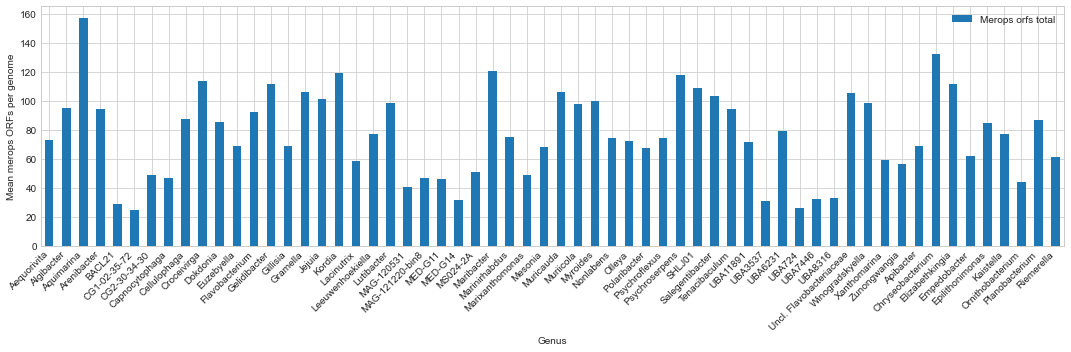

In [25]:
ax = df2.plot(kind="bar", figsize=(15,5))

plt.ylabel('Mean merops ORFs per genome')
plt.xticks(rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()

ax.figure.savefig("Merops_counts.svg", dpi=300)

# Plot2

In [26]:
df_namevfcode2 = df_namevfcode.groupby(['Genus']).filter(lambda x:x['Genus'].count()>7).groupby(['Genus', "Family"]).mean()
df_namevfcode2["Total"] = df_namevfcode2.sum(axis=1)
df_namevfcode2 = df_namevfcode2.reset_index()

#df_namevfcode2 = df_namevfcode2.sort_values(by=["Family", "Genus"])
df_namevfcode2 = df_namevfcode2.drop(columns="Family")
#df_namevfcode2 = df_namevfcode2.sort_index(axis=1, ascending=False)
df_namevfcode2.head()

,Genus,1700122C07Rik protein,"2-hydroxy-6-oxo-6-phenylhexa-2,4-dienoate hydrolase",2210023G05RIK protein,9030624L02RIK-like protein,ADAM12 peptidase,ADAM13 peptidase,ADAM19 peptidase,ADAM20 peptidase,ADAM21 peptidase,ADAM24 peptidase,ADAM28 peptidase,ADAM9 peptidase,ALE-1 glycylglycine endopeptidase,ALTERED MERISTEM PROGRAM1-like peptidase,AM-1 aminopeptidase,ASUB peptidase,AT4g33090 g.p.,AT5G17720 protein,AT5G17780 protein,AT5G22460 protein,AaaA aminopeptidase,Aad peptidase,Aap1' aminopeptidase,AarA peptidase,Abhd2a protein,Afg3-like protein 2,AlbD protein,AmpH protein,Anbu protein,Ape2 aminopeptidase,Apr peptidase,AprP peptidase,AprX peptidase,ArgJ protein,AsnB protein,At1g02560,At1g11080,At1g11090,At1g12750,At1g13270,At1g13610,At1g14270,At1g15045,At1g17430,At1g18360,At1g18600,At1g20380,At1g25220,At1g25290,At1g26120,At1g28110,At1g29840,At1g33540,At1g52580,At1g63660,At1g64670,At1g66670,At1g66900,At1g67420,At1g68620,At1g68900,At1g69020 g.p.,At1g70170,At1g71696,At1g72620,At1g73290,At1g73300,At1g73480,At1g74280,At1g76140,At1g77420,At1g78210,At2g16570,At2g18360,At2g19550,At2g20725,At2g22990,At2g23000,At2g23010,At2g24200,At2g24320,At2g29050,At2g39400,At2g39410,At2g39420,At2g45600,At2g47630,At3g01690,At3g02720,At3g02875,At3g03990,At3g05350,At3g05780,At3g09690,At3g10450,At3g10840 protein,At3g12220,At3g16150,At3g16550,At3g26085,At3g27740,At3g30380,At3g47560,At3g47590,At3g52000,At3g52020,At3g53780,At3g55180,At3g56540,At4g10030,At4g10050,At4g17150,At4g23070,At4g24150,At4g29210,At4g31020,At4g33180/At4g33190,At4g34740,At4g36530,At4g36610,At4g36760 g.p.,At4g37040,At4g37470,At4g38880,At4g39650,At5g02970,At5g04710,At5g07250,At5g08100,At5g09430,At5g09640,At5g11650,At5g13520 g.p.,At5g13800,At5g14390,At5g15860,At5g16080,At5g16120,At5g19630,At5g19740,At5g19850,At5g20520,At5g20660,At5g21950,At5g23140,At5g23530,At5g24260,At5g25770,At5g26860,At5g38220,At5g38520,At5g39220,At5g41900,At5g42320,At5g46390,At5g51740,At5g53050 or MhpC protein,At5g54140,At5g56650,At5g56730,At5g60160,At5g62180,AtFtsH1 peptidase,AtFtsH10 peptidase,AtFtsH11 peptidase,AtFtsH3 peptidase,AtFtsH5 peptidase,B0495.7 g.p.,BACCAC_01431 g.p.,BC026374 protein,BC4143 protein,BF9343_2924 g.p.,BG:DS00365.1 protein,BIRC-3 protein,BSNT_05883 g.p.,BSSC8_21440 g.p.,BSSC8_26020 g.p.,BSU23640 g.p.,BSU33620 g.p.,BSU6633_13517 g.p.,BT3549 putative peptidase,BapA peptidase,BapF peptidase,BcepAP aminopeptidase,BepA,BioH protein,BlaR1 peptidase,Bsubs1_010100013116 g.p.,C-terminal processing peptidase-1,C-terminal processing peptidase-2,C-terminal processing peptidase-3,C14orf29 protein,C35C5.2 g.p.,CAAX amino terminal peptidase,CC-III peptidase,CDF peptidase,CG10051 protein,CG10062 protein,CG1009 g.p.,CG10602 g.p.,CG11309 protein,CG11428,CG11529 protein,CG11951 protein,CG11956 protein,CG11961 protein,CG12133 protein,CG12374 protein,CG13160 protein,CG15111 protein,CG15253 protein,CG15820 protein,CG15879 protein,CG17571 protein,CG18642,CG1882 protein,CG2528 protein,CG2915 protein,CG3097 protein,CG31343 protein,CG32379 protein,CG3502 protein,CG4017 protein,CG42750 g.p.,CG4927 protein,CG5377,CG5704 protein,CG5707 protein,CG5715 protein,CG5845 protein,CG6154 protein,CG6512 protein,CG6696 protein,CG6763 protein,CG7142 protein,CG7529 protein,CG7649 protein,CG8539 protein,CG8560 protein,CG8562 protein,CG8563 protein,CG8773 protein,CG8774 protein,CG9542 protein,CGI-58 putative peptidase,CP70 cold-active peptidase,CPG70 carboxypeptidase,CPO-A2,CPX2 protein,CPXaC peptidase,CTP synthetase,CapD poly-gamma-glutamate hydrolase,Caul_3875-type dipeptidase,CelM peptidase,Cg30047 protein,Cg31019-pa,Cg33013-pb protein,Cg8972 protein,ClpP1 peptidase,ClpP4 peptidase,ComC peptidase,Cp-IAP protein,CspA peptidase,CspB peptidase,CspC peptidase,CtpA peptidase,CtpB peptidase,CtpC peptidase,D-Ala-D-Ala carboxypeptidase,D-Ala-D-Ala carboxypeptidase B,D-Ala-D-Ala carboxypeptidase DacF,D-Ala-D-Ala carboxypeptidase PBP3,D-Ala-D-Ala peptidase C,D-amino acid amidase,D-aminopeptidase DppA,D230019K24Rik peptidase,DD-carboxypeptidase p

In [27]:
df_namevfcode3 = df_namevfcode2.copy().set_index("Genus").drop(columns=["Total"]).T
df_namevfcode3["Total"] = df_namevfcode3.sum(axis=1)
df_namevfcode3 = df_namevfcode3.sort_values(by="Total", ascending=False)
df_namevfcode4 = df_namevfcode3.head(20)
df_namevfcode4.head()

Genus,Aequorivita,Algibacter,Apibacter,Aquimarina,Arenibacter,BACL21,CG1-02-35-72,CG2-30-34-30,Capnocytophaga,Cellulophaga,Chryseobacterium,Croceivirga,Dokdonia,Elizabethkingia,Empedobacter,Epilithonimonas,Euzebyella,Flavobacterium,Gelidibacter,Gillisia,Gramella,Jejuia,Kaistella,Kordia,Lacinutrix,Leeuwenhoekiella,Lutibacter,MAG-120531,MAG-121220-bin8,MED-G11,MED-G14,MS024-2A,Maribacter,Marinirhabdus,Marixanthomonas,Mesonia,Muricauda,Muriicola,Myroides,Nonlabens,Olleya,Ornithobacterium,Planobacterium,Polaribacter,Psychroflexus,Psychroserpens,Riemerella,SHLJ01,Salegentibacter,Tenacibaculum,UBA11891,UBA3537,UBA6231,UBA724,UBA7446,UBA8316,Uncl. Flavobacteriaceae,Winogradskyella,Xanthomarina,Zunongwangia,Total
Mername-AA292 peptidase,1.595238,1.888889,1.666667,2.666667,1.636364,0.666667,0.125,1.375,0.800000,1.904762,1.571429,2.000,2.181818,1.507772,1.045455,1.322581,0.888889,1.200340,2.166667,1.272727,1.5625,2.111111,1.000000,2.875,1.000000,1.315789,1.571429,1.000000,1.000000,0.875,1.000000,1.473684,1.711111,1.214286,0.888889,1.947368,2.377358,2.375,2.00,1.464286,1.538462,1.000000,1.181818,1.298246,1.705882,1.166667,0.779661,2.083333,2.157895,1.941176,1.875,1.000000,2.076923,0.555556,1.000000,0.916667,1.714286,1.927273,1.272727,1.230769,88.668081
dihydro-orotase,1.285714,1.555556,1.761905,1.564103,1.363636,1.000000,0.500,1.375,1.333333,1.333333,1.527211,2.000,1.272727,1.476684,0.022727,1.483871,1.111111,2.030560,1.583333,1.090909,2.4375,2.000000,1.416667,1.375,1.000000,1.236842,1.714286,1.068966,1.636364,1.375,1.000000,1.368421,1.555556,1.428571,0.666667,1.789474,1.528302,1.875,2.56,1.464286,1.230769,0.000000,1.727273,1.263158,2.529412,2.083333,1.559322,2.250000,1.842105,1.602941,1.750,1.083333,1.538462,0.666667,1.000000,0.833333,1.666667,1.600000,1.090909,0.846154,85.332452
Pab87 peptidase,0.714286,0.333333,0.047619,9.102564,1.636364,0.000000,0.000,0.375,0.000000,0.666667,3.404762,4.375,1.909091,2.896373,0.954545,2.129032,1.000000,1.494058,2.500000,0.545455,0.8750,0.555556,1.104167,1.125,0.555556,0.868421,1.000000,0.000000,0.636364,0.000,0.166667,0.157895,2.422222,0.714286,0.444444,1.210526,2.830189,1.500,0.86,1.321429,0.769231,0.333333,1.454545,0.877193,0.941176,2.833333,0.000000,1.166667,0.631579,0.867647,0.125,0.000000,1.153846,0.000000,0.000000,0.000000,2.047619,2.109091,0.727273,0.307692,68.777094
YMXG peptidase,0.857143,1.000000,0.904762,2.025641,0.090909,0.066667,0.625,0.500,0.853333,1.809524,2.469388,1.625,1.727273,2.238342,0.522727,0.677419,0.444444,1.032258,1.000000,1.909091,2.4375,0.222222,1.687500,2.000,1.000000,1.526316,1.285714,0.896552,0.818182,0.875,0.416667,0.368421,1.266667,0.642857,0.888889,1.105263,1.226415,1.000,2.00,1.142857,1.846154,0.555556,2.181818,1.035088,0.941176,1.500000,2.322034,1.833333,2.105263,1.264706,0.625,0.583333,0.000000,0.444444,0.166667,0.500000,1.571429,1.454545,0.090909,1.384615,67.592014
YebA peptidase,0.976190,1.444444,0.095238,1.153846,1.272727,0.666667,0.625,1.125,1.146667,0.666667,0.534014,2.125,0.636364,0.000000,0.000000,0.096774,1.666667,1.120543,1.583333,1.181818,1.7500,1.666667,0.250000,1.625,1.000000,1.000000,1.666667,1.137931,1.181818,1.625,0.916667,0.947368,1.955556,1.357143,0.666667,1.157895,1.094340,1.000,1.00,1.000000,0.923077,1.000000,0.636364,1.298246,1.117647,2.583333,0.000000,1.666667,2.473684,1.573529,1.750,0.750000,0.923077,0.888889,0.833333,1.000000,1.666667,1.436364,1.000000,0.923077,66.559630


In [28]:
df_namevfcode3[df_namevfcode3["Total"] < 100].sum(axis=0).to_frame().T

Genus,Aequorivita,Algibacter,Apibacter,Aquimarina,Arenibacter,BACL21,CG1-02-35-72,CG2-30-34-30,Capnocytophaga,Cellulophaga,Chryseobacterium,Croceivirga,Dokdonia,Elizabethkingia,Empedobacter,Epilithonimonas,Euzebyella,Flavobacterium,Gelidibacter,Gillisia,Gramella,Jejuia,Kaistella,Kordia,Lacinutrix,Leeuwenhoekiella,Lutibacter,MAG-120531,MAG-121220-bin8,MED-G11,MED-G14,MS024-2A,Maribacter,Marinirhabdus,Marixanthomonas,Mesonia,Muricauda,Muriicola,Myroides,Nonlabens,Olleya,Ornithobacterium,Planobacterium,Polaribacter,Psychroflexus,Psychroserpens,Riemerella,SHLJ01,Salegentibacter,Tenacibaculum,UBA11891,UBA3537,UBA6231,UBA724,UBA7446,UBA8316,Uncl. Flavobacteriaceae,Winogradskyella,Xanthomarina,Zunongwangia,Total
0,73.047619,94.888889,69.142857,156.923077,94.272727,29.066667,25.125,49.25,47.2,87.619048,132.629252,113.5,85.454545,111.590674,62.318182,84.741935,68.666667,92.219015,111.916667,68.363636,105.6875,101.333333,77.291667,119.625,58.666667,77.184211,98.571429,40.724138,47.0,46.125,31.916667,51.315789,119.622222,75.357143,48.444444,68.578947,105.660377,97.875,100.18,74.714286,72.384615,44.444444,86.818182,67.508772,74.470588,118.25,61.559322,108.666667,103.473684,94.735294,71.375,31.166667,79.615385,26.0,32.583333,33.083333,105.095238,98.818182,59.181818,56.0,4629.040801


In [29]:
df_namevfcode4.head()

Genus,Aequorivita,Algibacter,Apibacter,Aquimarina,Arenibacter,BACL21,CG1-02-35-72,CG2-30-34-30,Capnocytophaga,Cellulophaga,Chryseobacterium,Croceivirga,Dokdonia,Elizabethkingia,Empedobacter,Epilithonimonas,Euzebyella,Flavobacterium,Gelidibacter,Gillisia,Gramella,Jejuia,Kaistella,Kordia,Lacinutrix,Leeuwenhoekiella,Lutibacter,MAG-120531,MAG-121220-bin8,MED-G11,MED-G14,MS024-2A,Maribacter,Marinirhabdus,Marixanthomonas,Mesonia,Muricauda,Muriicola,Myroides,Nonlabens,Olleya,Ornithobacterium,Planobacterium,Polaribacter,Psychroflexus,Psychroserpens,Riemerella,SHLJ01,Salegentibacter,Tenacibaculum,UBA11891,UBA3537,UBA6231,UBA724,UBA7446,UBA8316,Uncl. Flavobacteriaceae,Winogradskyella,Xanthomarina,Zunongwangia,Total
Mername-AA292 peptidase,1.595238,1.888889,1.666667,2.666667,1.636364,0.666667,0.125,1.375,0.800000,1.904762,1.571429,2.000,2.181818,1.507772,1.045455,1.322581,0.888889,1.200340,2.166667,1.272727,1.5625,2.111111,1.000000,2.875,1.000000,1.315789,1.571429,1.000000,1.000000,0.875,1.000000,1.473684,1.711111,1.214286,0.888889,1.947368,2.377358,2.375,2.00,1.464286,1.538462,1.000000,1.181818,1.298246,1.705882,1.166667,0.779661,2.083333,2.157895,1.941176,1.875,1.000000,2.076923,0.555556,1.000000,0.916667,1.714286,1.927273,1.272727,1.230769,88.668081
dihydro-orotase,1.285714,1.555556,1.761905,1.564103,1.363636,1.000000,0.500,1.375,1.333333,1.333333,1.527211,2.000,1.272727,1.476684,0.022727,1.483871,1.111111,2.030560,1.583333,1.090909,2.4375,2.000000,1.416667,1.375,1.000000,1.236842,1.714286,1.068966,1.636364,1.375,1.000000,1.368421,1.555556,1.428571,0.666667,1.789474,1.528302,1.875,2.56,1.464286,1.230769,0.000000,1.727273,1.263158,2.529412,2.083333,1.559322,2.250000,1.842105,1.602941,1.750,1.083333,1.538462,0.666667,1.000000,0.833333,1.666667,1.600000,1.090909,0.846154,85.332452
Pab87 peptidase,0.714286,0.333333,0.047619,9.102564,1.636364,0.000000,0.000,0.375,0.000000,0.666667,3.404762,4.375,1.909091,2.896373,0.954545,2.129032,1.000000,1.494058,2.500000,0.545455,0.8750,0.555556,1.104167,1.125,0.555556,0.868421,1.000000,0.000000,0.636364,0.000,0.166667,0.157895,2.422222,0.714286,0.444444,1.210526,2.830189,1.500,0.86,1.321429,0.769231,0.333333,1.454545,0.877193,0.941176,2.833333,0.000000,1.166667,0.631579,0.867647,0.125,0.000000,1.153846,0.000000,0.000000,0.000000,2.047619,2.109091,0.727273,0.307692,68.777094
YMXG peptidase,0.857143,1.000000,0.904762,2.025641,0.090909,0.066667,0.625,0.500,0.853333,1.809524,2.469388,1.625,1.727273,2.238342,0.522727,0.677419,0.444444,1.032258,1.000000,1.909091,2.4375,0.222222,1.687500,2.000,1.000000,1.526316,1.285714,0.896552,0.818182,0.875,0.416667,0.368421,1.266667,0.642857,0.888889,1.105263,1.226415,1.000,2.00,1.142857,1.846154,0.555556,2.181818,1.035088,0.941176,1.500000,2.322034,1.833333,2.105263,1.264706,0.625,0.583333,0.000000,0.444444,0.166667,0.500000,1.571429,1.454545,0.090909,1.384615,67.592014
YebA peptidase,0.976190,1.444444,0.095238,1.153846,1.272727,0.666667,0.625,1.125,1.146667,0.666667,0.534014,2.125,0.636364,0.000000,0.000000,0.096774,1.666667,1.120543,1.583333,1.181818,1.7500,1.666667,0.250000,1.625,1.000000,1.000000,1.666667,1.137931,1.181818,1.625,0.916667,0.947368,1.955556,1.357143,0.666667,1.157895,1.094340,1.000,1.00,1.000000,0.923077,1.000000,0.636364,1.298246,1.117647,2.583333,0.000000,1.666667,2.473684,1.573529,1.750,0.750000,0.923077,0.888889,0.833333,1.000000,1.666667,1.436364,1.000000,0.923077,66.559630


In [30]:
df_namevfcode5 = pd.concat([df_namevfcode4, df_namevfcode3[df_namevfcode3["Total"] < 100].sum(axis=0).to_frame().T])

df_namevfcode5 = df_namevfcode5.sort_values(by="Total", ascending=False).drop(columns="Total")
df_namevfcode5.head()

Genus,Aequorivita,Algibacter,Apibacter,Aquimarina,Arenibacter,BACL21,CG1-02-35-72,CG2-30-34-30,Capnocytophaga,Cellulophaga,Chryseobacterium,Croceivirga,Dokdonia,Elizabethkingia,Empedobacter,Epilithonimonas,Euzebyella,Flavobacterium,Gelidibacter,Gillisia,Gramella,Jejuia,Kaistella,Kordia,Lacinutrix,Leeuwenhoekiella,Lutibacter,MAG-120531,MAG-121220-bin8,MED-G11,MED-G14,MS024-2A,Maribacter,Marinirhabdus,Marixanthomonas,Mesonia,Muricauda,Muriicola,Myroides,Nonlabens,Olleya,Ornithobacterium,Planobacterium,Polaribacter,Psychroflexus,Psychroserpens,Riemerella,SHLJ01,Salegentibacter,Tenacibaculum,UBA11891,UBA3537,UBA6231,UBA724,UBA7446,UBA8316,Uncl. Flavobacteriaceae,Winogradskyella,Xanthomarina,Zunongwangia
0,73.047619,94.888889,69.142857,156.923077,94.272727,29.066667,25.125,49.250,47.200000,87.619048,132.629252,113.500,85.454545,111.590674,62.318182,84.741935,68.666667,92.219015,111.916667,68.363636,105.6875,101.333333,77.291667,119.625,58.666667,77.184211,98.571429,40.724138,47.000000,46.125,31.916667,51.315789,119.622222,75.357143,48.444444,68.578947,105.660377,97.875,100.18,74.714286,72.384615,44.444444,86.818182,67.508772,74.470588,118.250000,61.559322,108.666667,103.473684,94.735294,71.375,31.166667,79.615385,26.000000,32.583333,33.083333,105.095238,98.818182,59.181818,56.000000
Mername-AA292 peptidase,1.595238,1.888889,1.666667,2.666667,1.636364,0.666667,0.125,1.375,0.800000,1.904762,1.571429,2.000,2.181818,1.507772,1.045455,1.322581,0.888889,1.200340,2.166667,1.272727,1.5625,2.111111,1.000000,2.875,1.000000,1.315789,1.571429,1.000000,1.000000,0.875,1.000000,1.473684,1.711111,1.214286,0.888889,1.947368,2.377358,2.375,2.00,1.464286,1.538462,1.000000,1.181818,1.298246,1.705882,1.166667,0.779661,2.083333,2.157895,1.941176,1.875,1.000000,2.076923,0.555556,1.000000,0.916667,1.714286,1.927273,1.272727,1.230769
dihydro-orotase,1.285714,1.555556,1.761905,1.564103,1.363636,1.000000,0.500,1.375,1.333333,1.333333,1.527211,2.000,1.272727,1.476684,0.022727,1.483871,1.111111,2.030560,1.583333,1.090909,2.4375,2.000000,1.416667,1.375,1.000000,1.236842,1.714286,1.068966,1.636364,1.375,1.000000,1.368421,1.555556,1.428571,0.666667,1.789474,1.528302,1.875,2.56,1.464286,1.230769,0.000000,1.727273,1.263158,2.529412,2.083333,1.559322,2.250000,1.842105,1.602941,1.750,1.083333,1.538462,0.666667,1.000000,0.833333,1.666667,1.600000,1.090909,0.846154
Pab87 peptidase,0.714286,0.333333,0.047619,9.102564,1.636364,0.000000,0.000,0.375,0.000000,0.666667,3.404762,4.375,1.909091,2.896373,0.954545,2.129032,1.000000,1.494058,2.500000,0.545455,0.8750,0.555556,1.104167,1.125,0.555556,0.868421,1.000000,0.000000,0.636364,0.000,0.166667,0.157895,2.422222,0.714286,0.444444,1.210526,2.830189,1.500,0.86,1.321429,0.769231,0.333333,1.454545,0.877193,0.941176,2.833333,0.000000,1.166667,0.631579,0.867647,0.125,0.000000,1.153846,0.000000,0.000000,0.000000,2.047619,2.109091,0.727273,0.307692
YMXG peptidase,0.857143,1.000000,0.904762,2.025641,0.090909,0.066667,0.625,0.500,0.853333,1.809524,2.469388,1.625,1.727273,2.238342,0.522727,0.677419,0.444444,1.032258,1.000000,1.909091,2.4375,0.222222,1.687500,2.000,1.000000,1.526316,1.285714,0.896552,0.818182,0.875,0.416667,0.368421,1.266667,0.642857,0.888889,1.105263,1.226415,1.000,2.00,1.142857,1.846154,0.555556,2.181818,1.035088,0.941176,1.500000,2.322034,1.833333,2.105263,1.264706,0.625,0.583333,0.000000,0.444444,0.166667,0.500000,1.571429,1.454545,0.090909,1.384615


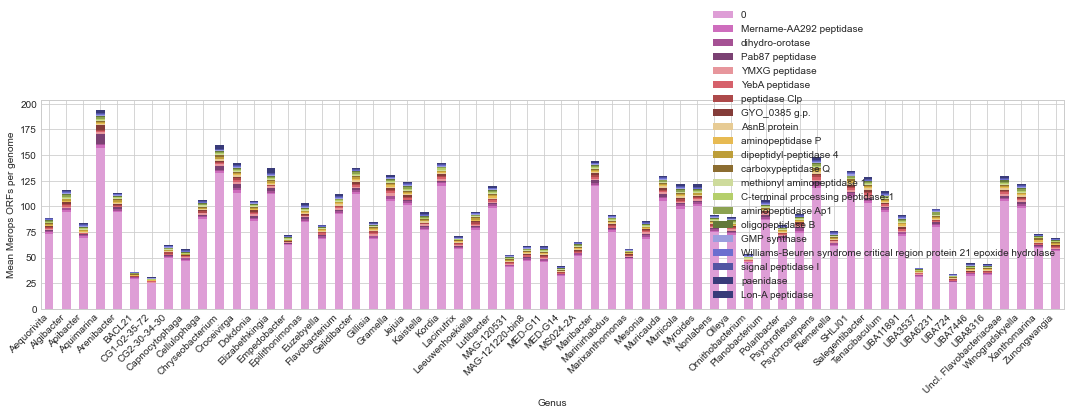

In [31]:
from matplotlib import cm
cmap = cm.get_cmap('tab20b_r') # Colour map (there are many others)
ax = df_namevfcode5.T.plot(kind="bar", figsize=(15,5), cmap=cmap,
                           stacked=True)

plt.ylabel('Mean Merops ORFs per genome')
plt.xticks(rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()

ax.figure.savefig("Merops_types.svg", dpi=300)

# Comparison

In [32]:
statistics = pd.read_csv("../../3_Annotation/Statistics.csv")
statistics.head()

,Unnamed: 0,orfs,pfam,ko,cog,cazymes,Orfs_anno_ko%,Orfs_anno_cog%,Orfs_anno_cazymes%
0,GCA_002431085.1,2758,4628,1162,1809,47,42.131980,65.591008,1.704133
1,GCA_002302445.1,2226,3776,859,1364,65,38.589398,61.275831,2.920036
2,GCA_014075215.1,4465,5916,1129,2260,52,25.285554,50.615901,1.164614
3,GCA_900186555.1,2294,4094,975,1534,56,42.502180,66.870096,2.441151
4,GCA_001670625.1,1980,3428,865,1313,38,43.686869,66.313131,1.919192


In [33]:
merge = pd.merge(statistics, merops, how="left", left_on="Unnamed: 0", right_on="index")
merge["Orfs_anno_merops%"] = merge["Merops orfs total"]/merge["orfs"]*100
merge =pd.merge(merge,metadata, how="left", left_on="Unnamed: 0", right_on="Assembly accession")
merge.head()

,Unnamed: 0,orfs,pfam,ko,cog,cazymes,Orfs_anno_ko%,Orfs_anno_cog%,Orfs_anno_cazymes%,index,Merops orfs total,Orfs_anno_merops%,Assembly accession,Genus,Family
0,GCA_002431085.1,2758,4628,1162,1809,47,42.131980,65.591008,1.704133,GCA_002431085.1,6,0.217549,GCA_002431085.1,Empedobacter,Weeksellaceae
1,GCA_002302445.1,2226,3776,859,1364,65,38.589398,61.275831,2.920036,GCA_002302445.1,2,0.089847,GCA_002302445.1,Capnocytophaga,Flavobacteriaceae
2,GCA_014075215.1,4465,5916,1129,2260,52,25.285554,50.615901,1.164614,GCA_014075215.1,90,2.015677,GCA_014075215.1,SCGC-AAA160-P02,Flavobacteriaceae
3,GCA_900186555.1,2294,4094,975,1534,56,42.502180,66.870096,2.441151,GCA_900186555.1,97,4.228422,GCA_900186555.1,Flavobacterium,Flavobacteriaceae
4,GCA_001670625.1,1980,3428,865,1313,38,43.686869,66.313131,1.919192,GCA_001670625.1,81,4.090909,GCA_001670625.1,Riemerella,Weeksellaceae


In [34]:
df1 = merge.groupby(['Genus']).filter(lambda x:x['Genus'].count()>7).groupby(['Genus', "Family"]).mean().reset_index().sort_values(by=["Family","Genus"]).set_index("Genus")
df1["P"] = df1["Merops orfs total"]/(df1["cazymes"]+df1["Merops orfs total"])*2
df1.head()

,Family,orfs,pfam,ko,cog,cazymes,Orfs_anno_ko%,Orfs_anno_cog%,Orfs_anno_cazymes%,Merops orfs total,Orfs_anno_merops%,P
Genus,,,,,,,,,,,,
Aequorivita,Flavobacteriaceae,2958.714286,5003.000000,1139.166667,1827.642857,53.309524,38.569948,61.822365,1.796647,73.047619,2.427991,1.156209
Algibacter,Flavobacteriaceae,4080.777778,6760.111111,1593.888889,2521.000000,178.888889,39.321717,62.255655,4.441777,94.888889,2.382086,0.693182
Aquimarina,Flavobacteriaceae,4699.179487,7480.384615,1615.974359,2742.461538,109.076923,34.756690,58.658220,2.314977,157.410256,3.271211,1.181372
Arenibacter,Flavobacteriaceae,4260.409091,7264.545455,1646.045455,2774.545455,145.636364,38.733654,65.150642,3.392553,94.272727,2.289456,0.785904
BACL21,Flavobacteriaceae,2058.000000,3472.533333,863.933333,1340.400000,41.200000,42.815937,65.936525,2.010007,29.066667,1.695340,0.827324


In [35]:
df2 = df1.sort_values(by="P")
df2.head()

,Family,orfs,pfam,ko,cog,cazymes,Orfs_anno_ko%,Orfs_anno_cog%,Orfs_anno_cazymes%,Merops orfs total,Orfs_anno_merops%,P
Genus,,,,,,,,,,,,
Zunongwangia,Flavobacteriaceae,3524.153846,6000.307692,1395.692308,2293.461538,160.769231,39.746073,65.175136,4.505454,56.461538,1.648169,0.519830
Algibacter,Flavobacteriaceae,4080.777778,6760.111111,1593.888889,2521.000000,178.888889,39.321717,62.255655,4.441777,94.888889,2.382086,0.693182
Leeuwenhoekiella,Flavobacteriaceae,3311.368421,5628.947368,1293.078947,2138.394737,143.947368,39.060889,64.567442,4.285048,77.473684,2.343240,0.699786
Euzebyella,Flavobacteriaceae,3674.888889,6500.666667,1469.444444,2455.444444,126.777778,39.987963,66.805686,3.419021,68.666667,1.971097,0.702672
CG1-02-35-72,Flavobacteriaceae,2051.125000,3649.750000,929.500000,1431.750000,42.750000,45.212832,69.677600,2.052269,25.125000,1.334023,0.740331


In [43]:
df2[df2["P"]>=1].sort_values(by="P", ascending=True).head()

,Family,orfs,pfam,ko,cog,cazymes,Orfs_anno_ko%,Orfs_anno_cog%,Orfs_anno_cazymes%,Merops orfs total,Orfs_anno_merops%,P
Genus,,,,,,,,,,,,
UBA7446,Flavobacteriaceae,1358.166667,2498.916667,695.583333,986.666667,32.416667,51.921652,73.513749,2.400972,32.583333,2.497943,1.002564
CG2-30-34-30,Flavobacteriaceae,2554.000000,4134.375000,1000.000000,1584.125000,48.625000,39.118050,61.975769,1.898623,49.250000,1.872561,1.006386
UBA724,Flavobacteriaceae,1252.777778,2360.111111,661.222222,938.000000,25.666667,52.991751,75.139658,2.025897,26.000000,2.135767,1.006452
UBA6231,Flavobacteriaceae,2903.307692,4805.769231,1181.615385,1860.076923,78.384615,40.799591,64.156074,2.687712,79.615385,2.756422,1.007790
Gelidibacter,Flavobacteriaceae,3511.916667,6096.000000,1405.416667,2287.166667,108.916667,40.211134,65.259037,3.113377,111.916667,3.211480,1.013585


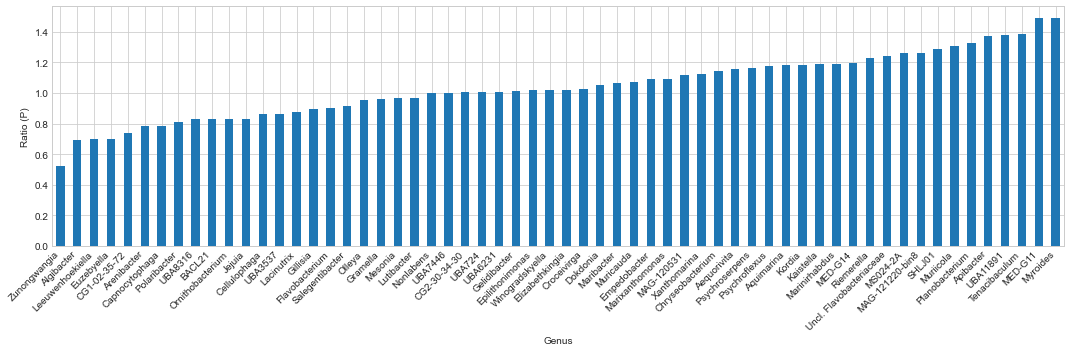

In [37]:
ax = df2["P"].plot(kind="bar",figsize=(15,5))

plt.ylabel('Ratio (P)')
plt.xticks(rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()

ax.figure.savefig("Ratio.svg", dpi=300)

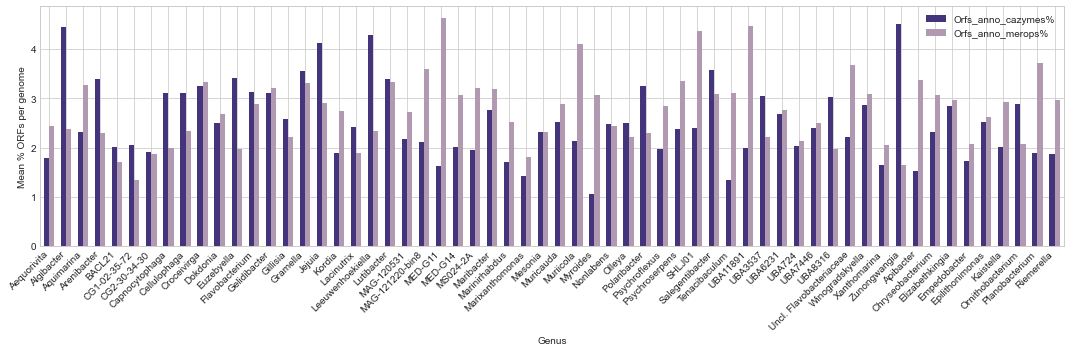

In [39]:
#plt.style.use('fivethirtyeight') 
ax = df1[["Orfs_anno_cazymes%","Orfs_anno_merops%"]].plot(kind="bar", figsize=(15,5), color=["#44347c","#b199b1"],width=0.6)

plt.ylabel('Mean % ORFs per genome')
plt.xticks(rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()

ax.figure.savefig("Merops_relabund.svg", dpi=300)

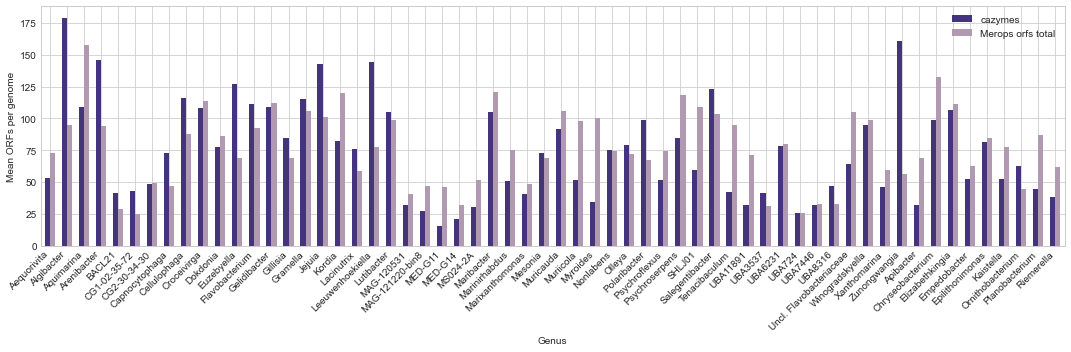

In [40]:
ax = df1[["cazymes","Merops orfs total"]].plot(kind="bar", figsize=(15,5), color=["#44347c","#b199b1"],width=0.6)

plt.ylabel('Mean ORFs per genome')
plt.xticks(rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()

ax.figure.savefig("Merops_counts.svg", dpi=300)

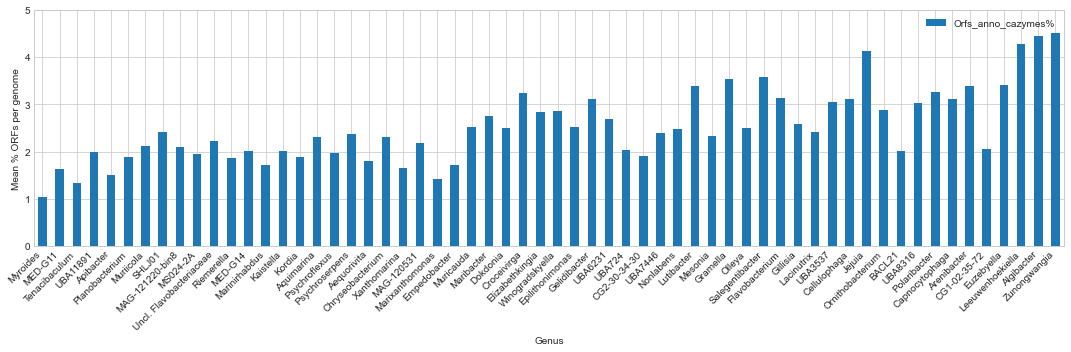

In [41]:
df3 = df1.sort_values(by="P",ascending=False)
ax = df3[["Orfs_anno_cazymes%"]].plot(kind="bar", figsize=(15,5), )
ax.set_ylim(0,5)
plt.ylabel('Mean % ORFs per genome')
plt.xticks(rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()


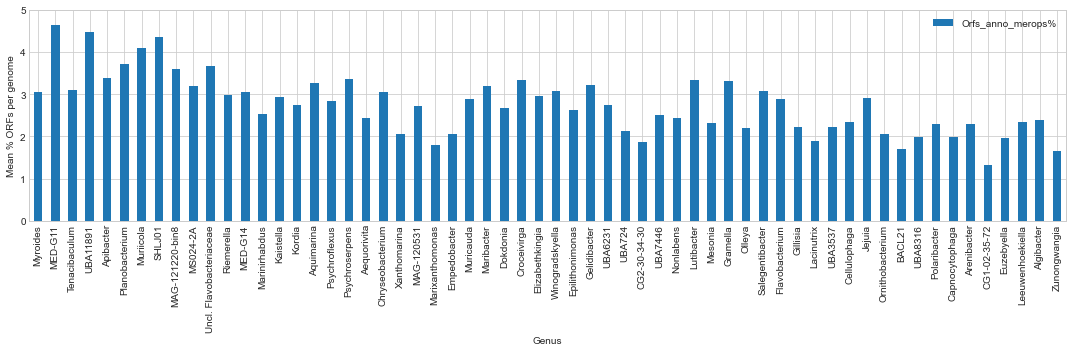

In [42]:
ax = df3[["Orfs_anno_merops%"]].plot(kind="bar", figsize=(15,5))
ax.set_ylim(0,5)
plt.ylabel('Mean % ORFs per genome')
#plt.xticks(rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()
